# EXAMPLE OF DATA PRE-PROCESSING


In [34]:
# We would need these libraries to manage our dataset
# Numpy: used for large, multi-dimensional arrays and matrices, and for high-level mathematical functions
# Pandas: used for data manipulation and analysis
# matplotlib: used for visualisation and plotting graph/image/etc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Iris Dataset

The iris dataset is one of the simplest existing dataset, and probably the most known and used to start doing classification. It contains 150 data about 3 types of iris, 50 sample of each. 

More information here: https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset

In [35]:
# Import the iris dataset from sklearn
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
from sklearn.datasets import load_iris
# load the dataset
iris = load_iris()
# transform the dataset into a Pandas DataFrame to make it easier to display
# it is not necessary to understand what is done here
dataset = pd.DataFrame(data= np.column_stack([iris['data'], iris['target']]),
                     columns= iris['feature_names'] + ['target'])

We can observe that the dataset has 5 feature, one of them, the "target" being the label, that categorise the data.

The 4 feature are all numerical and continuous.

In [36]:
# Head visualise the five first rows of your dataset
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


We know what kind of value are stored in our datatset, with what kind of features, but we don't know what it looks like. This is where visualisation tools help us.

We can observe that one of the class is linearly separable from the 2 others.

[]

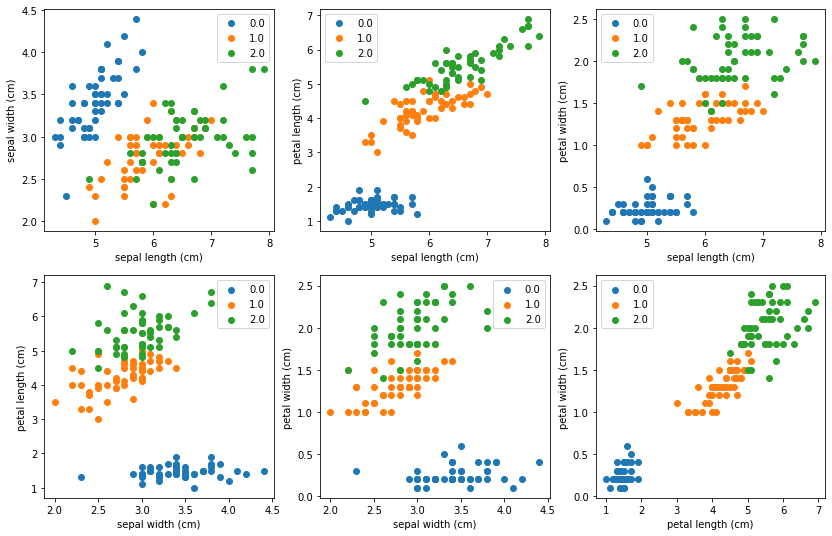

In [4]:
fig, axs = plt.subplots(2,3, figsize=(14,9))
color = ['tab:blue', 'tab:orange', 'tab:green']
for i in np.unique(dataset['target']): # 0, 1, 2
    idx = dataset['target'] == i
    axs[0][0].scatter(dataset['sepal length (cm)'][idx], dataset['sepal width (cm)'][idx], c=color[int(i)], label=i)
    axs[0][1].scatter(dataset['sepal length (cm)'][idx], dataset['petal length (cm)'][idx], c=color[int(i)], label=i)
    axs[0][2].scatter(dataset['sepal length (cm)'][idx], dataset['petal width (cm)'][idx], c=color[int(i)], label=i)
    axs[1][0].scatter(dataset['sepal width (cm)'][idx], dataset['petal length (cm)'][idx], c=color[int(i)], label=i)
    axs[1][1].scatter(dataset['sepal width (cm)'][idx], dataset['petal width (cm)'][idx], c=color[int(i)], label=i)
    axs[1][2].scatter(dataset['petal length (cm)'][idx], dataset['petal width (cm)'][idx], c=color[int(i)], label=i)
# label
for i in range(3):
    axs[0][i].set_xlabel('sepal length (cm)')
for i in range(2):
    axs[1][i].set_xlabel('sepal width (cm)')
axs[1][2].set_xlabel('petal length (cm)')
axs[0][0].set_ylabel('sepal width (cm)')
axs[0][1].set_ylabel('petal length (cm)')
axs[0][2].set_ylabel('petal width (cm)')
axs[1][0].set_ylabel('petal length (cm)')
axs[1][1].set_ylabel('petal width (cm)')
axs[1][2].set_ylabel('petal width (cm)')
for i in range(3):
    for j in range(2):
        axs[j][i].legend()
plt.plot()    

Continuous values are easily visualised using histogram. Here is a simple example, using arbitrarily define bins. 

[]

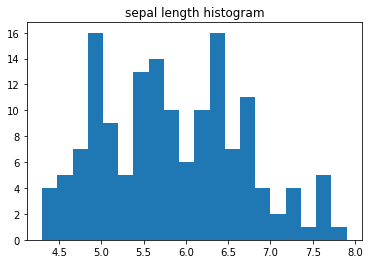

In [37]:
plt.hist(dataset['sepal length (cm)'], bins=20)
plt.title('sepal length histogram')
plt.plot()

## Titanic dataset

In [43]:
'''
This line will allow us to load the dataset
The dataset should be in a CSV format
A CSV file is a delimited text file that uses a comma to separate values. 
Each line of the file is a data record.
''' 
# header: indicates if the dataset has an initial line with the name of each column
# 0 is the index of the first row
dataset = pd.read_csv('./dataset/titanic.csv', header=0)

This time we have more feature, and they are not all numerical nor continuous.
- Survived: Nominal
- Pclass: Nominal (or ordinal if you consider that the class can be ranked)
- Name: Nominal
- Sex: Nominal
- Age: Continuous(ish)
- Siblings/Spouses Aboard: Discrete
- Parents/Children Aboard: Discrete
- Fare: Continuous

In [44]:
# Head visualise the five first rows of your dataset
dataset.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [45]:
'''
First, we will try to 'visualise' the dataset, by looking at the data
'''
# describe shows us a nice summary of descriptive statistics for each of the columns
print(dataset.describe())

         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   14.45420  
75%                   0.000000   31.13750  
max              

Note that columns are shown from zero to N-1
* Count: gives us the number of rows in the dataset
* Mean: mean of all the values in each column
* std: standard deviation
* min, max: minimum and maximum values
* 25%, 50%, and 75%: the 25th, 50th, and 75th percentiles, which is the same than quantile 1, quantile 2, and quantile 3

In [46]:
"""
You can also do something similar by hand, if you want to easily see all possible value
of categorical variable or the range of numerical variable
"""
for i in dataset.columns:
    if i != 'Name':
        tmp = np.unique(dataset[i])
        if len(tmp) > 20:
            print(f'{i}: [{tmp[0]} -- {tmp[-1]}]')
        else:
            print(f'{i}: {tmp}')

Survived: [0 1]
Pclass: [1 2 3]
Sex: ['female' 'male']
Age: [0.42 -- 80.0]
Siblings/Spouses Aboard: [0 1 2 3 4 5 8]
Parents/Children Aboard: [0 1 2 3 4 5 6]
Fare: [0.0 -- 512.3292]


Again we want to get a visual understanding of our dataset. However the data is not anymore just some float value. We have a lot of nominal value for example. Also, we have 7 feature and the target, which means we have to chose what to plot, because we can't have 3000 plot to visualize.

We can still use histogram to visualise any type of value. For numerical it's useful to visualise the distribution.

79


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

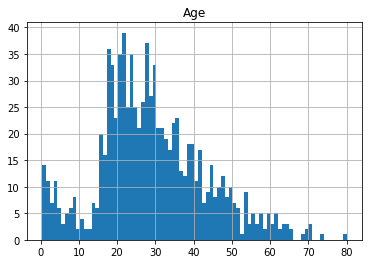

In [47]:
# we compute the range of age between the maximum and minimum value
age_range = int(dataset['Age'].max() - dataset['Age'].min())
print(age_range)
dataset.hist(column='Age', bins=80)

Pie chart are not often use for visualisation, but can be also made in python. They can be useful when you have a small set of value to have a visual of how they are distributed

['female' 'male'] [314 573]


[]

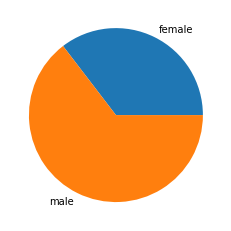

In [11]:
lb, x = np.unique(dataset['Sex'], return_counts=True)
print(lb, x)
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(x, labels=lb)
plt.plot()

Scatter plot are usually good when visuallising continuous data. They can work with discrete value if there's a high number of value, but the less value the more useless it is

<AxesSubplot:xlabel='Age', ylabel='Siblings/Spouses Aboard'>

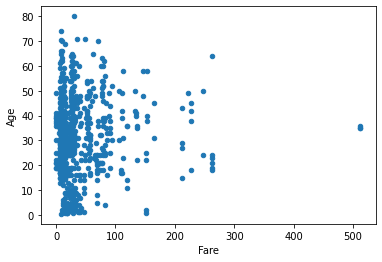

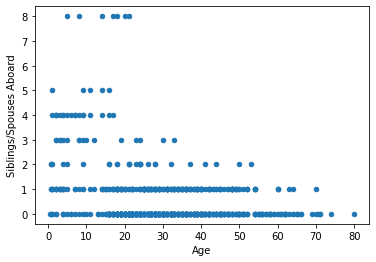

In [12]:
dataset.plot.scatter(x='Fare', y='Age')
dataset.plot.scatter(x='Age', y='Siblings/Spouses Aboard')

Pandas has some easy way to plot multi variable histogram

In [48]:
u = np.unique(dataset['Sex'])
print(u)
dataset_2 = dataset.copy(True)
for i in range(len(u)):
    dataset_2 = dataset['Sex'].replace(u[i], i)

['female' 'male']


However if you prefer to have them on the same histogram, it is a bit harder. The visualisation is here to help you understand the data, so the above one is fine. If you want to use graph for a presentation, you may want to spend more time doing proper graph.

[]

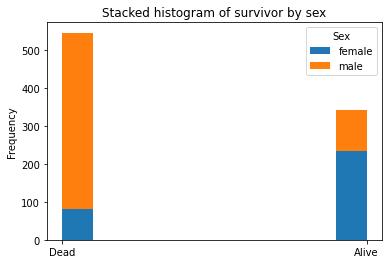

In [52]:
counts = dataset.pivot(columns='Sex').Survived
ax = plt.subplot(111)
ax.set_xticks([0,1])
ax.set_xticklabels(['Dead', 'Alive'])
counts.plot(kind='hist', stacked=True, title='Stacked histogram of survivor by sex', ax = ax)
plt.plot()

In the same way we just plot an histogram with 2 binary variable, we can plot one with variable that have a bigger set of possible value.

Parents/Children Aboard    0   1    2   3   4   5   6
0                        1.0 NaN  NaN NaN NaN NaN NaN
1                        1.0 NaN  NaN NaN NaN NaN NaN
2                        0.0 NaN  NaN NaN NaN NaN NaN
3                        1.0 NaN  NaN NaN NaN NaN NaN
4                        0.0 NaN  NaN NaN NaN NaN NaN
..                       ...  ..  ...  ..  ..  ..  ..
882                      0.0 NaN  NaN NaN NaN NaN NaN
883                      0.0 NaN  NaN NaN NaN NaN NaN
884                      NaN NaN  1.0 NaN NaN NaN NaN
885                      0.0 NaN  NaN NaN NaN NaN NaN
886                      0.0 NaN  NaN NaN NaN NaN NaN

[887 rows x 7 columns]


[]

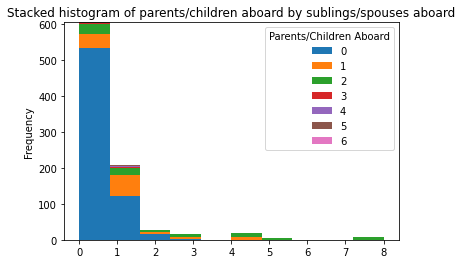

In [51]:
counts = dataset.pivot(columns='Parents/Children Aboard')['Siblings/Spouses Aboard']
print(counts)
ax = plt.subplot(111)
ax.set_xlabel('Siblings/Spouses Aboard')
counts.plot(kind='hist', stacked=True, title='Stacked histogram of parents/children aboard by sublings/spouses aboard', ax = ax)
plt.plot()

We can see there is a few people that have "8" siblings/spouses on board. If we take a closer look, we can deduce that there's is probably 7 brother and sister and each of them has a spouses. 

In [16]:
for u, c in zip(*np.unique(dataset['Siblings/Spouses Aboard'], return_counts=True)):
    print('s/s:', u, 'nb:', c)

s/s: 0 nb: 604
s/s: 1 nb: 209
s/s: 2 nb: 28
s/s: 3 nb: 16
s/s: 4 nb: 18
s/s: 5 nb: 5
s/s: 8 nb: 7


We saw earlier how to plot stacked histogram for multiple variable. However, you may sometimes want to have non stacked histogram. The different plot come with different visual bias made by the brain when interpreting the plot. 

The function used here is a bit more complex than the previous one, but this way we can generate non stacked histogram, which we can't with the way we did before. 

[]

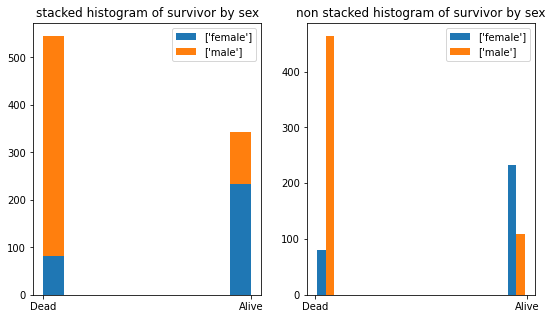

In [55]:
counts = dataset.groupby(['Sex'], as_index=False)
fig, axs = plt.subplots(1,2, figsize=(9,5))
axs[0].hist([i[1]['Survived'] for i in counts], stacked=True, label=[i[0] for i in counts])
axs[1].hist([i[1]['Survived'] for i in counts], stacked=False, label=[i[0] for i in counts])
# sugar style
axs[0].set_title('stacked histogram of survivor by sex')
axs[1].set_title('non stacked histogram of survivor by sex')
axs[0].legend()
axs[1].legend()
axs[0].set_xticks([0,1])
axs[0].set_xticklabels(['Dead', 'Alive'])
axs[1].set_xticks([0,1])
axs[1].set_xticklabels(['Dead', 'Alive'])
plt.plot()

Another example of the difference of representation of the same information

[]

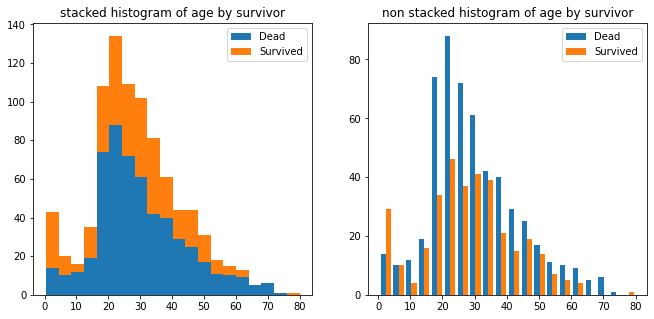

In [56]:
counts = dataset.groupby(['Survived'], as_index=False)
fig, axs = plt.subplots(1,2, figsize=(11,5))
axs[0].hist([i[1]['Age'] for i in counts], stacked=True, label=[['Dead', 'Survived'][i[0][0]] for i in counts], bins=20)
axs[1].hist([i[1]['Age'] for i in counts], stacked=False, label=[['Dead', 'Survived'][i[0][0]] for i in counts], bins=20)
# sugar style
axs[0].set_title('stacked histogram of age by survivor')
axs[1].set_title('non stacked histogram of age by survivor')
axs[0].legend()
axs[1].legend()
plt.plot()

Here is a fancy plot with a lot of information.

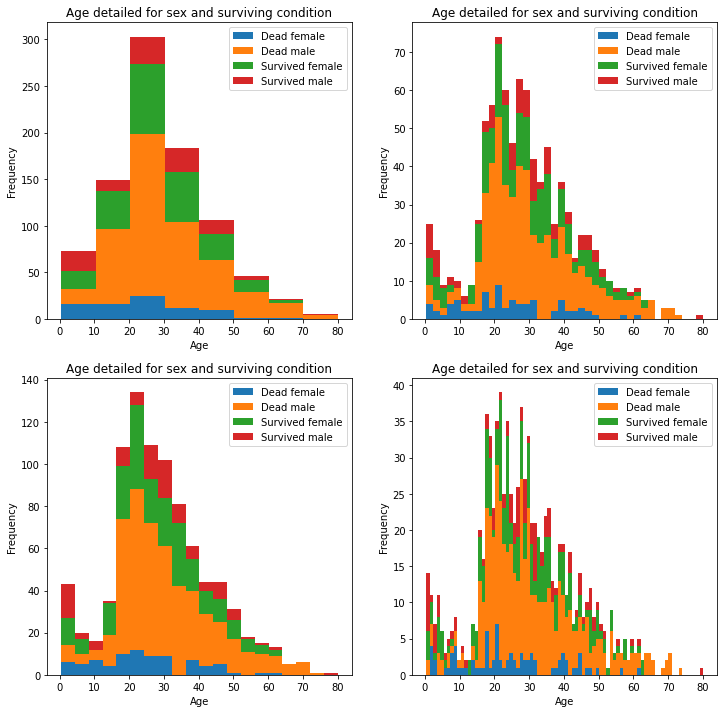

In [57]:
counts = dataset.groupby(['Survived', 'Sex'], as_index=False)
fig, axs = plt.subplots(2,2, figsize=(12,12))
axs[0][0].hist([i[1]['Age'] for i in counts], stacked=True, label=[['Dead', 'Survived'][i[0][0]] + ' ' + i[0][1] for i in counts], bins=8)
axs[1][0].hist([i[1]['Age'] for i in counts], stacked=True, label=[['Dead', 'Survived'][i[0][0]] + ' ' + i[0][1] for i in counts], bins=20)
axs[0][1].hist([i[1]['Age'] for i in counts], stacked=True, label=[['Dead', 'Survived'][i[0][0]] + ' ' + i[0][1] for i in counts], bins=40)
axs[1][1].hist([i[1]['Age'] for i in counts], stacked=True, label=[['Dead', 'Survived'][i[0][0]] + ' ' + i[0][1] for i in counts], bins=80)

for i in range(2):
    for j in range(2):
        axs[i][j].legend()
        axs[i][j].set_title('Age detailed for sex and surviving condition')
        axs[i][j].set_ylabel('Frequency')
        axs[i][j].set_xlabel('Age')

The only motivation to show this function is that it his very cool and interesting

[]

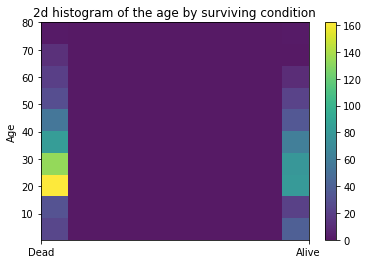

In [31]:
plt.hist2d(dataset['Survived'], dataset['Age'], alpha=0.9)
plt.xticks([0,1], ['Dead', 'Alive'])
plt.ylabel('Age')
plt.colorbar()
plt.title('2d histogram of the age by surviving condition')
plt.plot()

The example below is to show another example of multiple graph sharing the same information, but displayed differently.

[]

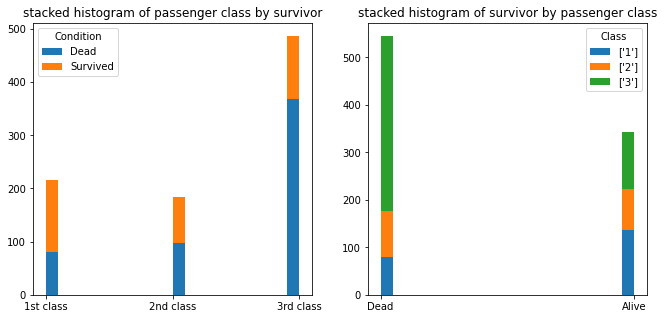

In [58]:
counts1 = dataset.groupby(['Survived'], as_index=False)
counts2 = dataset.groupby(['Pclass'], as_index=False)
fig, axs = plt.subplots(1,2, figsize=(11,5))
axs[0].hist([i[1]['Pclass'] for i in counts1], stacked=True, label=[['Dead', 'Survived'][i[0][0]] for i in counts1], bins=20)
axs[1].hist([i[1]['Survived'] for i in counts2], stacked=True, label=[i[0] for i in counts2], bins=20)
# sugar style
axs[0].set_title('stacked histogram of passenger class by survivor')
axs[1].set_title('stacked histogram of survivor by passenger class')
axs[0].legend(title='Condition')
axs[1].legend(title='Class')
axs[1].set_xticks([0,1])
axs[1].set_xticklabels(['Dead', 'Alive'])
axs[0].set_xticks([1,2,3])
axs[0].set_xticklabels(['1st class','2nd class','3rd class'])
plt.plot()